In [198]:
# Imports
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def simulateBest(trials, suitsNum, valNum):
    
    deckNum = suitsNum*valNum
    
    # Default: 10 'suits', normal 13 card values. This can be pared down if desired.
    suits = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"] # labeled w. letters for scalability
    values = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]

    suits = suits[:suitsNum]
    values = values[:valNum]
    
    # Card class
    class Card:
        def __init__(self, val, suit):
            self.value = val
            self.suit = suit

        def show(self):
            print("{} of {}".format(self.value, self.suit))

    # Deck class
    class Deck:
        def __init__(self):
            self.cards = []
            self.build()

        def build(self):
            for s in suits:
                for v in values:
                    self.cards.append(Card(v,s))

        def shuffle(self):
            for i in range(len(self.cards)-1, 0, -1):
                r = random.randint(0,i)
                self.cards[i], self.cards[r] = self.cards[r], self.cards[i]

        def drawCard(self):
            x = self.cards.pop()
            return x

        def show(self):
            for c in self.cards:
                c.show()
                
    # Comparison and Guessing Functions
    def compareValue(guess, card):
        if (guess == card.value):
            return 1
        else:
            return 0

    def bestGuess(cards_seen):
        if cards_seen == {}:
            return randomGuess(cards_seen)
        min_val = min(cards_seen.values())
        bestCards = [key for key in cards_seen if cards_seen[key] == min_val]
        return bestCards[0]

    def randomGuess(cards_seen):
        size = len(cards_seen)
        idx = random.randint(0,size-1)
        return Card(values[idx], "A").value

    def cardsDone(cards_seen):
        return all([value == suitsNum for value in cards_seen.values()])

    def smartGuess(cards_seen, focusNum):
        focus_cards = {}
        unfocus_cards = {}
        for (key, value) in cards_seen.items():
            if any([key == num for num in values[:focusNum]]):
                focus_cards[key] = value
            else:
                unfocus_cards[key] = value
        if (not cardsDone(focus_cards)):
            return bestGuess(focus_cards)
        else:
            return randomGuess(unfocus_cards)

    def summarize(technique, data):
        m = min(data)
        M = max(data)
        mean = np.mean(data)
        std = np.std(data)
        print(technique + ": \n    (min, max) = ("
              + str(m) + ", " + str(M) + ")\n    mean = " 
              + str(mean) + "\n    std = " + str(std))
        
    def runGame(trials, technique, focusNum):
        deckSize = range(deckNum)
        df = pd.DataFrame(columns=deckSize)

        for i in range(trials):
            deck = Deck()
            deck.shuffle()
            
            cards_seen = {}
            for key in values:
                cards_seen[key] = 0
                
            t = 0
            t_list = []

            for j in deckSize:
                drawnCard = deck.drawCard()
                if technique == smartGuess:
                    guess = technique(cards_seen, focusNum)
                else:
                    guess = technique(cards_seen)
                score = compareValue(guess, drawnCard)
                cards_seen[drawnCard.value] += 1
                if score == 1:
                    t += 1
                t_list.append(t)

            df = df.append(pd.Series(t_list, index=deckSize), ignore_index=True)

        scores = list(df[deckNum-1])
#         summarize(str(technique), scores)

        return df
    
    def makeBestGuess(trials):
        columns = ["focusNum", "mean", "std", "finalWinPct"]
        df = pd.DataFrame()
        
        data = runGame(trials, smartGuess, valNum)
        return np.mean(list(data[deckNum-1]))/deckNum
            
    return makeBestGuess(trials)

In [171]:
# Imports
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Main function. Will create trials of a (suitsNum*ValNum)-card deck
def simulate(trials, suitsNum, valNum):
    
    deckNum = suitsNum*valNum
    
    # Default: 10 'suits', normal 13 card values. This can be pared down if desired.
    suits = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"] # labeled w. letters for scalability
    values = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]

    suits = suits[:suitsNum]
    values = values[:valNum]
    
    # Card class
    class Card:
        def __init__(self, val, suit):
            self.value = val
            self.suit = suit

        def show(self):
            print("{} of {}".format(self.value, self.suit))

    # Deck class
    class Deck:
        def __init__(self):
            self.cards = []
            self.build()

        def build(self):
            for s in suits:
                for v in values:
                    self.cards.append(Card(v,s))

        def shuffle(self):
            for i in range(len(self.cards)-1, 0, -1):
                r = random.randint(0,i)
                self.cards[i], self.cards[r] = self.cards[r], self.cards[i]

        def drawCard(self):
            x = self.cards.pop()
            return x

        def show(self):
            for c in self.cards:
                c.show()
                
    # Comparison and Guessing Functions
    def compareValue(guess, card):
        if (guess == card.value):
            return 1
        else:
            return 0

    def bestGuess(cards_seen):
        if cards_seen == {}:
            return randomGuess(cards_seen)
        min_val = min(cards_seen.values())
        bestCards = [key for key in cards_seen if cards_seen[key] == min_val]
        return bestCards[0]

    def constantGuess(cards_seen):
        return "2"

    def randomGuess(cards_seen):
        size = len(cards_seen)
        idx = random.randint(0,size-1)
        return Card(values[idx], "A").value

    def realisticGuess(cards_seen):
        while cards_seen["2"] < m:
            return constantGuess(cards_seen)
        idx = random.randint(1,valNum-1)
        return Card(values[idx], "A").value

    def cardsDone(cards_seen):
        return all([value == suitsNum for value in cards_seen.values()])

    def smartGuess(cards_seen, focusNum):
        focus_cards = {}
        unfocus_cards = {}
        for (key, value) in cards_seen.items():
            if any([key == num for num in values[:focusNum]]):
                focus_cards[key] = value
            else:
                unfocus_cards[key] = value
        if (not cardsDone(focus_cards)):
            return bestGuess(focus_cards)
        else:
            return randomGuess(unfocus_cards)

    def summarize(technique, data):
        m = min(data)
        M = max(data)
        mean = np.mean(data)
        std = np.std(data)
        print(technique + ": \n    (min, max) = ("
              + str(m) + ", " + str(M) + ")\n    mean = " 
              + str(mean) + "\n    std = " + str(std))
        
    def runGame(trials, technique, focusNum):
        deckSize = range(deckNum)
        df = pd.DataFrame(columns=deckSize)

        for i in range(trials):
            deck = Deck()
            deck.shuffle()
            
            cards_seen = {}
            for key in values:
                cards_seen[key] = 0
                
            t = 0
            t_list = []

            for j in deckSize:
                drawnCard = deck.drawCard()
                if technique == smartGuess:
                    guess = technique(cards_seen, focusNum)
                else:
                    guess = technique(cards_seen)
                score = compareValue(guess, drawnCard)
                cards_seen[drawnCard.value] += 1
                if score == 1:
                    t += 1
                t_list.append(t)

            df = df.append(pd.Series(t_list, index=deckSize), ignore_index=True)

        scores = list(df[deckNum-1])
        summarize(str(technique), scores)

        return df
    
    def makeTrials(trials):
        columns = ["focusNum", "mean", "std", "finalWinPct"]

        df = pd.DataFrame()
        dataframes = []
        for i in range(len(values)+1):
            data = runGame(trials, smartGuess, i)
            dataframes.append(data)
            df = df.append(pd.Series([i, np.mean(list(data[deckNum-1])), np.std(list(data[deckNum-1])), np.mean(list(data[deckNum-1]))/deckNum], columns), ignore_index=True)
        return df, dataframes
    
    def makeBestGuess(trials):
        columns = ["focusNum", "mean", "std", "finalWinPct"]

        df = pd.DataFrame()
        dataframes = []
        data = runGame(trials, smartGuess, valNum)
        dataframes.append(data)
        df = df.append(pd.Series([valNum, np.mean(list(data[deckNum-1])), np.std(list(data[deckNum-1])), np.mean(list(data[deckNum-1]))/deckNum], columns), ignore_index=True)
        return df, dataframes
        
    def plotGame(datalist):
    #     fig, lines = plt.subplots(2,2, figsize = (20, 16))
        fig, ax = plt.subplots(figsize = (16,8))
        fig, lines = plt.subplots(figsize = (8, 8))

        for i in range(len(datalist)):
            x = i%2
            y = int(np.floor(i/2))

            lines.plot(datalist[i].mean())
    #         lines.plot(datalist[i].std())
    #         lines[x][y].plot(datalist[i].max())
#             lines[x][y].plot(datalist[i].min())
            lines.grid('both')
            lines.set_title("Comparing guessing strategies over time")
            lines.set_ylim(0,10)
            lines.set_yticks(range(11))
        #     lines[0].plot((np.mean(scores) / 52)*np.arange(52))



        scores = [list(datalist[0][deckNum-1]), list(datalist[1][deckNum-1]), list(datalist[2][deckNum-1]), list(datalist[3][deckNum-1])]
        for i in [3,2,1,0]:
            binNum = max(scores[i]) - min(scores[i])
            if binNum == 0:
                    binNum += 2
            ax.hist(scores[i], alpha=0.7, bins=binNum)
            ax.set_xticks(range(max(scores[i])+1))
            
    df, dataframes = makeBestGuess(trials)
    return df

In [324]:
def make3DData(trials):
    columns = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
    df = pd.DataFrame(columns=columns)
    for k in range(13):
        df = df.append(pd.Series([0]*10, columns), ignore_index=True)
    for i in range(1, 11):
        print("Calculating w/ ", i, " suits...")
        for j in range(1,14):
            df[columns[i-1]][j-1] = float(simulateBest(trials, i, j))
            
    df = df.rename(columns={"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "H":7, "I":8, "J":9})
    return df

In [333]:
%%time
df = make3DData(10000)

Calculating w/  1  suits...
Calculating w/  2  suits...
Calculating w/  3  suits...
Calculating w/  4  suits...
Calculating w/  5  suits...
Calculating w/  6  suits...
Calculating w/  7  suits...
Calculating w/  8  suits...
Calculating w/  9  suits...
Calculating w/  10  suits...
CPU times: user 1h 1min 44s, sys: 7min 17s, total: 1h 9min 2s
Wall time: 1h 10min 12s


In [335]:
copy = df

In [334]:
df

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,1,1,1,1,1,1
1,0.7454,0.703925,0.68285,0.666013,0.65157,0.641975,0.633871,0.628175,0.623261,0.6174
2,0.613833,0.56145,0.532,0.511592,0.496327,0.485983,0.47701,0.469725,0.46183,0.45646
3,0.516925,0.470075,0.441358,0.422194,0.40668,0.395133,0.386757,0.37875,0.371575,0.366775
4,0.45474,0.40703,0.378867,0.35978,0.34506,0.33398,0.327289,0.31993,0.313376,0.307962
5,0.40965,0.360033,0.334872,0.315937,0.302173,0.291672,0.284681,0.277677,0.272194,0.267087
6,0.371443,0.325457,0.298629,0.281914,0.269326,0.26011,0.252535,0.246107,0.240425,0.236219
7,0.339187,0.296956,0.273004,0.254922,0.24389,0.235215,0.226259,0.2209,0.216686,0.211828
8,0.314333,0.272839,0.249156,0.233439,0.222611,0.214341,0.207565,0.20145,0.197009,0.192257
9,0.29373,0.25295,0.22989,0.216262,0.205926,0.19746,0.191204,0.185622,0.180993,0.176724


In [337]:
final = pd.DataFrame()
for i in range(10):
    final = final.append(pd.to_numeric(df[i], errors='coerce'))

In [361]:
final = final.transpose()
final

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.745400,0.613833,0.516925,0.454740,0.409650,0.371443,0.339187,0.314333,0.293730,0.274609,0.258125,0.242385
1,1.0,0.703925,0.561450,0.470075,0.407030,0.360033,0.325457,0.296956,0.272839,0.252950,0.237786,0.220542,0.209462
2,1.0,0.682850,0.532000,0.441358,0.378867,0.334872,0.298629,0.273004,0.249156,0.229890,0.215291,0.201194,0.190064
3,1.0,0.666013,0.511592,0.422194,0.359780,0.315937,0.281914,0.254922,0.233439,0.216262,0.201577,0.187885,0.176750
4,1.0,0.651570,0.496327,0.406680,0.345060,0.302173,0.269326,0.243890,0.222611,0.205926,0.191185,0.178198,0.167391
5,1.0,0.641975,0.485983,0.395133,0.333980,0.291672,0.260110,0.235215,0.214341,0.197460,0.182491,0.170849,0.160615
6,1.0,0.633871,0.477010,0.386757,0.327289,0.284681,0.252535,0.226259,0.207565,0.191204,0.176640,0.164039,0.154748
7,1.0,0.628175,0.469725,0.378750,0.319930,0.277677,0.246107,0.220900,0.201450,0.185622,0.171541,0.159608,0.149853
8,1.0,0.623261,0.461830,0.371575,0.313376,0.272194,0.240425,0.216686,0.197009,0.180993,0.167509,0.155572,0.146042
9,1.0,0.617400,0.456460,0.366775,0.307962,0.267087,0.236219,0.211828,0.192257,0.176724,0.163889,0.152426,0.142408


In [418]:
new = final.transpose()
new
yeet = new[3]
yeet

0     1.000000
1     0.666013
2     0.511592
3     0.422194
4     0.359780
5     0.315937
6     0.281914
7     0.254922
8     0.233439
9     0.216262
10    0.201577
11    0.187885
12    0.176750
Name: 3, dtype: float64

In [403]:
ya = list(final[12])

In [405]:
ya

[0.24238461538461537,
 0.20946153846153845,
 0.19006410256410255,
 0.17675000000000002,
 0.16739076923076923,
 0.16061538461538463,
 0.15474835164835166,
 0.14985288461538462,
 0.14604188034188034,
 0.14240846153846154]

<IPython.core.display.Javascript object>


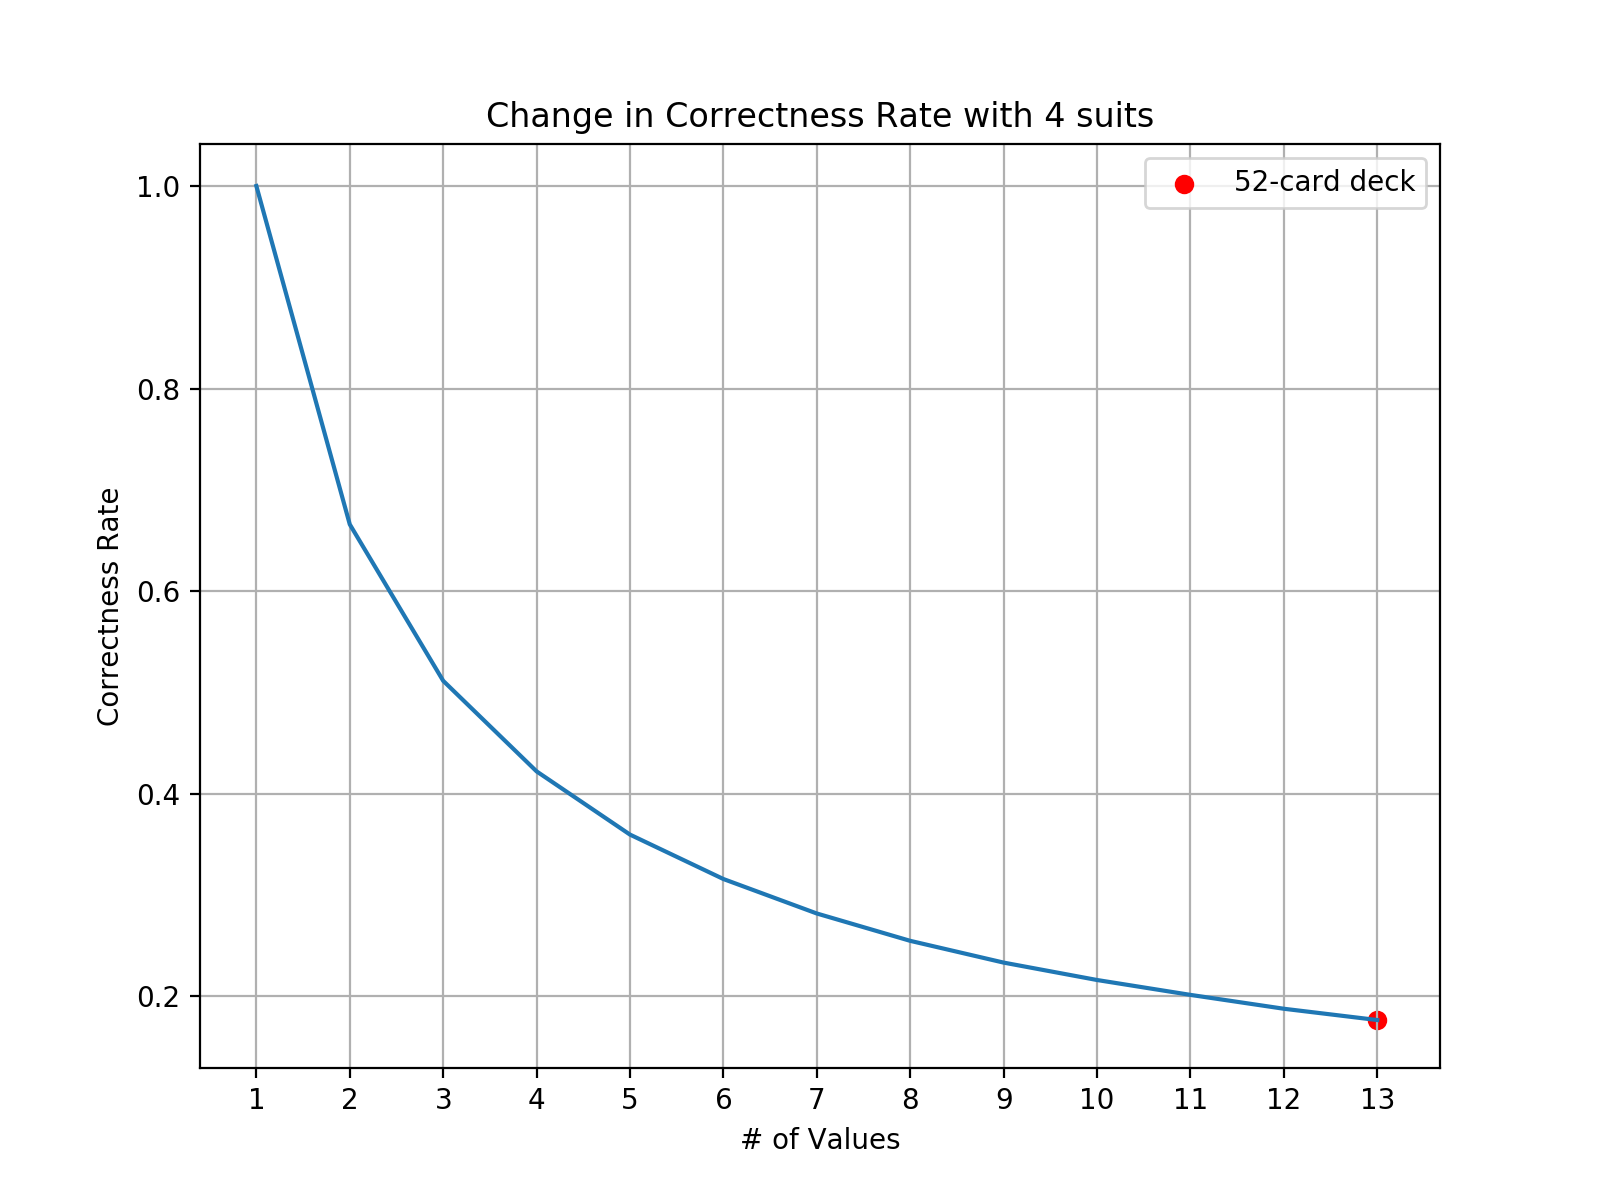

In [420]:
fig, ax = plt.subplots(figsize=(8,6))
x = range(1,14)
y = yeet
ax.plot(x, y)
ax.set_xticks(range(15))
ax.set_ylabel("Correctness Rate")
ax.set_xlabel("# of Values")
ax.set_title("Change in Correctness Rate with 4 suits")
ax.scatter(13, .17675, color="red", label="52-card deck")
ax.legend()
ax.grid('both')

<IPython.core.display.Javascript object>


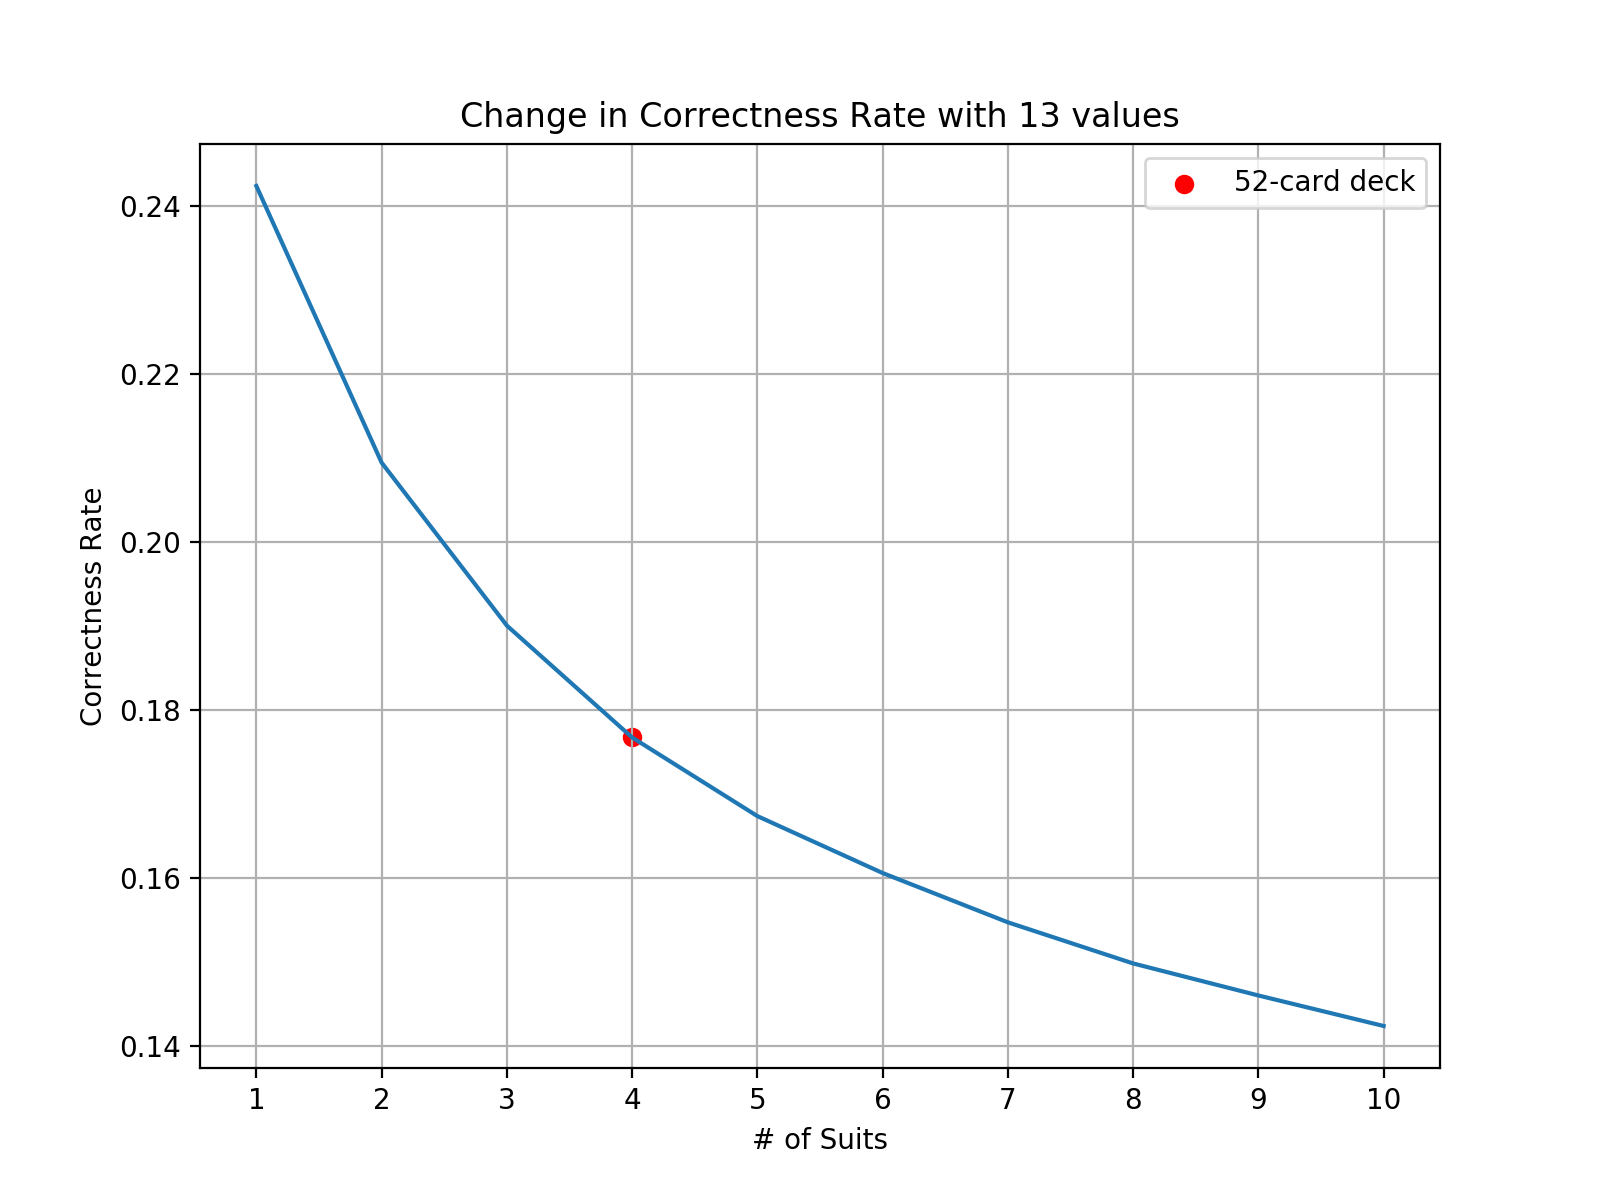

In [416]:
fig, ax = plt.subplots(figsize=(8,6))
x = range(1,11)
y = ya
ax.plot(x, y)
ax.set_xticks(range(11))
ax.set_ylabel("Correctness Rate")
ax.set_xlabel("# of Suits")
ax.set_title("Change in Correctness Rate with 13 values")
ax.scatter(4, .17675, color="red", label="52-card deck")
ax.legend()
ax.grid('both')

<IPython.core.display.Javascript object>


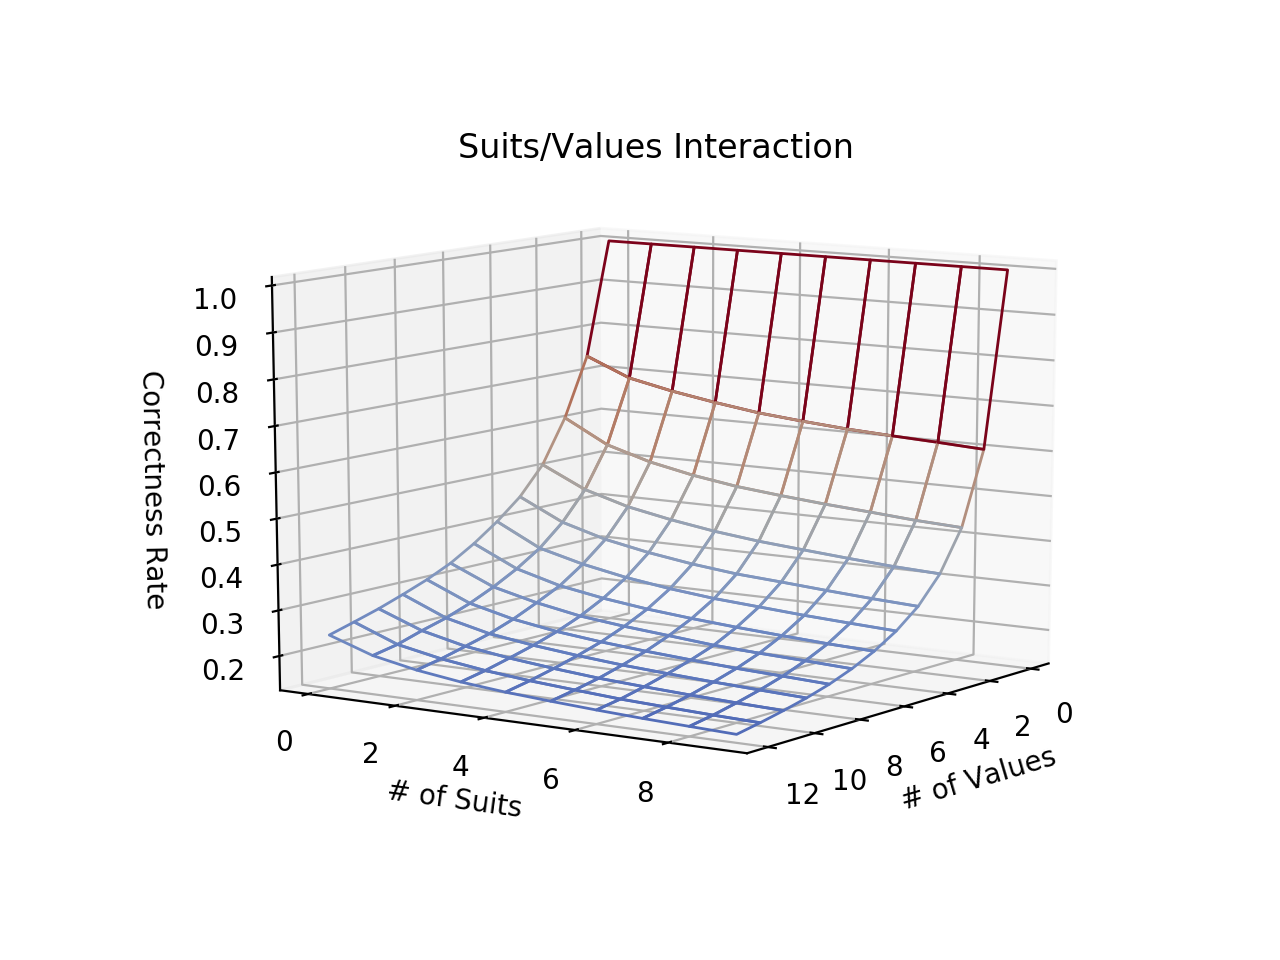

Text(0.5, 0.92, 'Suits/Values Interaction')

In [427]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x = final.columns.transpose()
y = final.index
X,Y = np.meshgrid(x,y)
Z = final

colors=cm.coolwarm(Z)
fig = plt.figure()
ax = fig.gca(projection='3d')
thing = ax.plot_surface(X,Y,Z, facecolors=colors)
thing.set_facecolor((0,0,0,0))
plt.show()
ax.set_xlabel("# of Values")
ax.set_ylabel("# of Suits")
ax.set_zlabel("Correctness Rate")
ax.set_title("Suits/Values Interaction")

<IPython.core.display.Javascript object>


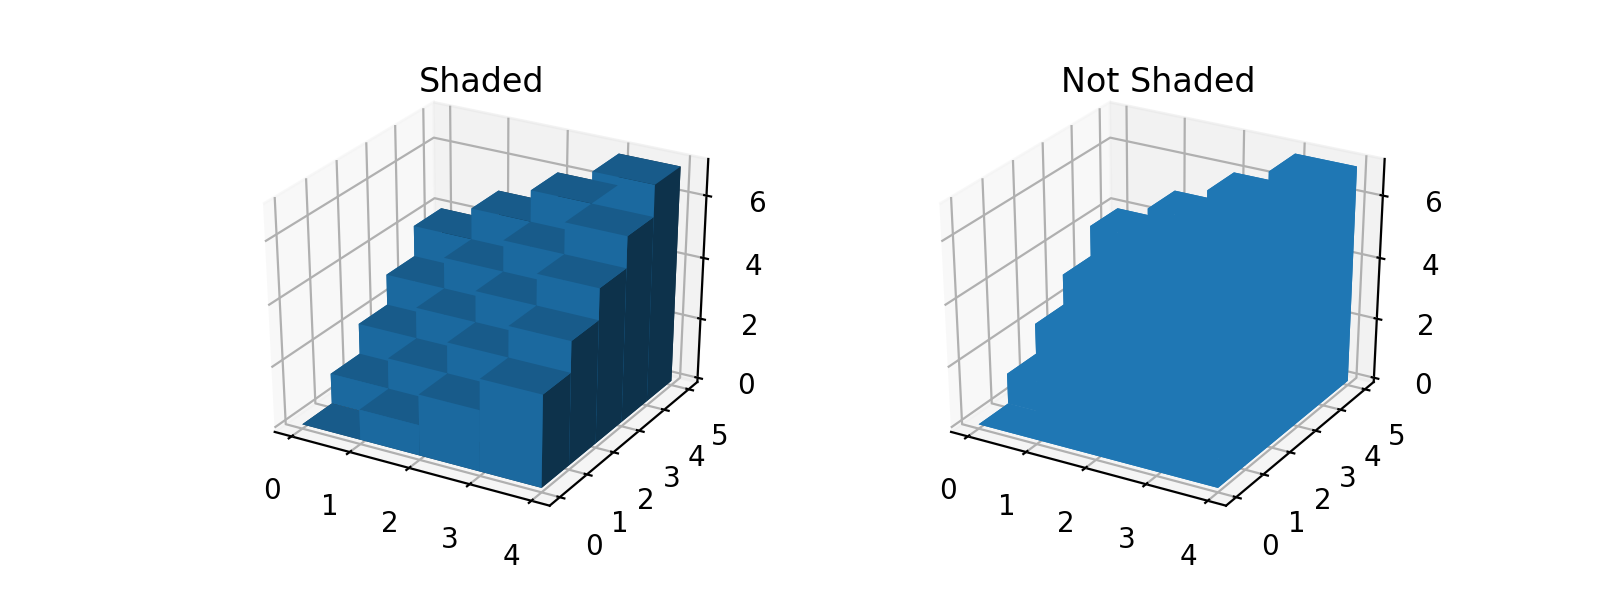

In [398]:
# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

In [380]:
data

0     1.000000
1     0.775000
2     0.646667
3     0.532500
4     0.416000
5     0.406667
6     0.362857
7     0.347500
8     0.332222
9     0.288000
10    0.289091
11    0.269167
12    0.231538
Name: A, dtype: float64

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x = np.arange(13)
y = final.index
X,Y = np.meshgrid(x,y)
Z = final
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)

In [152]:
df9['finalWinPct'][0]

0.31795833333333334

In [145]:
def plot(data):
    for stuff in data:
        plt.plot(stuff['finalWinPct'])
        plt.grid()

In [146]:
plot([df1, df3, df5, df7, df9])

KeyError: 0